In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houseDS=pd.read_csv('MagicBricks.csv')

In [3]:
houseDS.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [100]:
houseDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [123]:
houseDS.dropna(inplace=True)
houseDS.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.000000
mean,1504.301968,2.791045,2.575124,1.697512,2.224030e+07,15663.630846
std,1729.104830,0.961469,1.088503,3.223118,2.771744e+07,21170.160448
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,770.000000,2.000000,2.000000,1.000000,5.130000e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.000000,1.400000e+07,11363.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,39.000000,2.400000e+08,183333.000000


In [124]:
houseDS.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

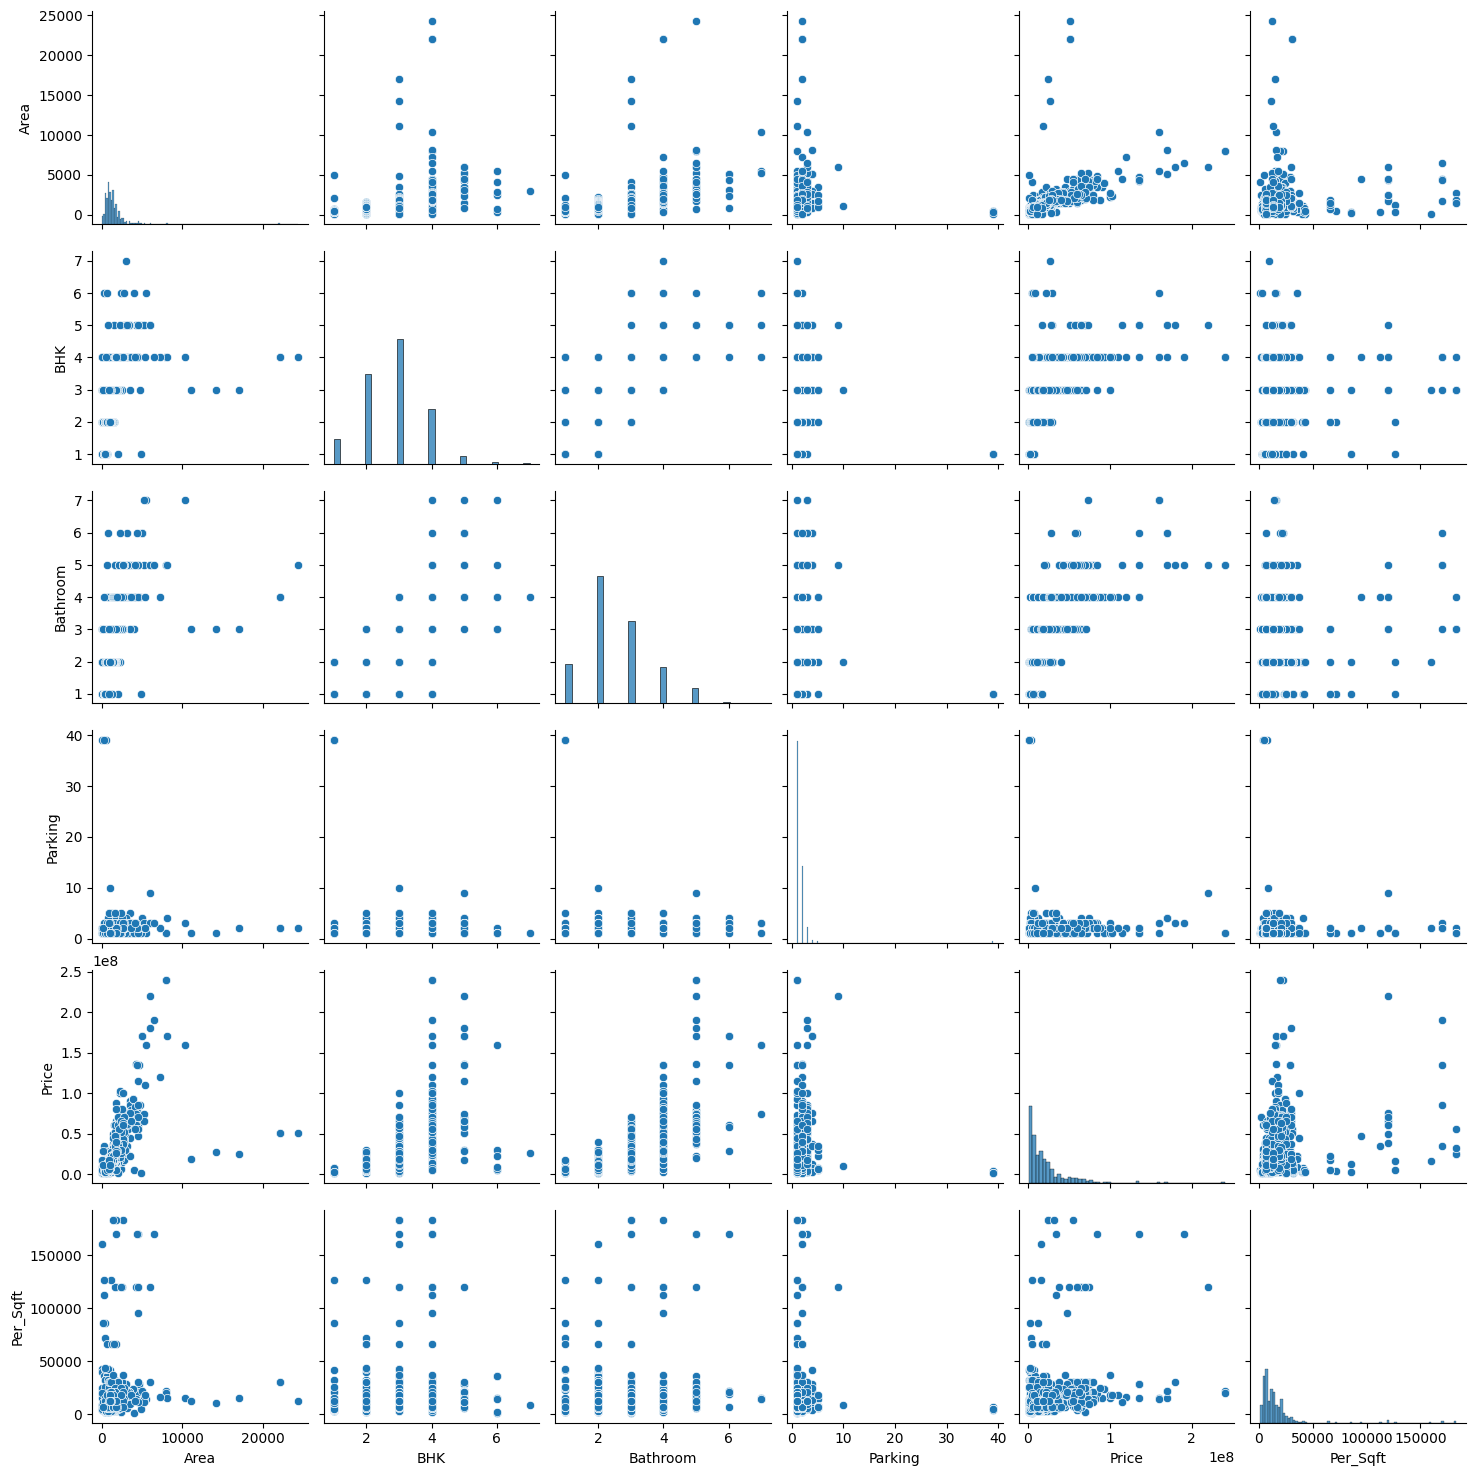

In [125]:
sns.pairplot(houseDS)

In [128]:
X=houseDS[['Area', 'BHK', 'Bathroom', 'Parking']]

          


In [129]:
Y=houseDS['Price']

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20)

In [132]:
X_train

,Area,BHK,Bathroom,Parking
1187,1150.0,2,3.0,2.0
465,1600.0,3,2.0,1.0
539,1700.0,4,3.0,2.0
667,2100.0,3,4.0,2.0
292,1240.0,3,3.0,2.0
...,...,...,...,...
152,450.0,2,1.0,1.0
597,1450.0,3,3.0,1.0
876,390.0,1,1.0,39.0
1001,900.0,3,2.0,1.0


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>]], dtype=object)

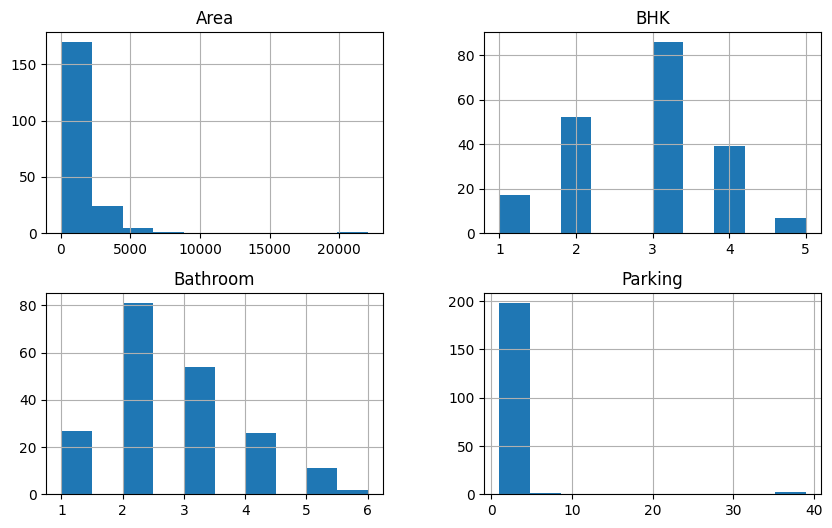

In [153]:
X_test.hist(figsize=(10,6))

<Axes: >

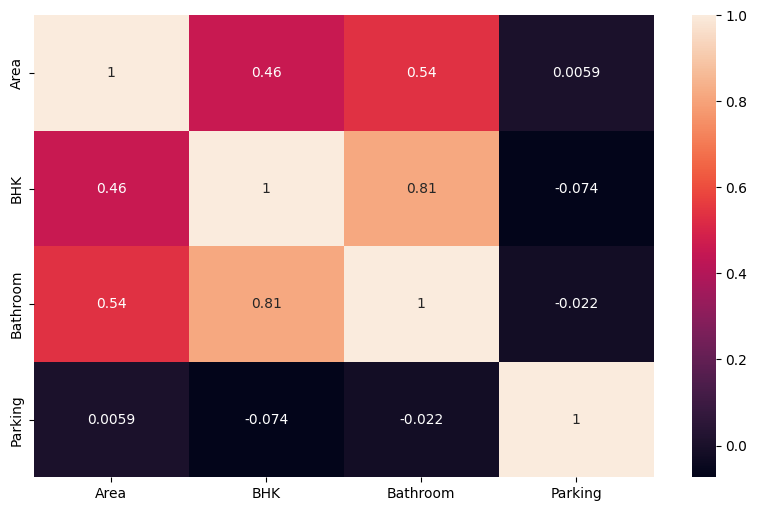

In [152]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(),annot=True)

In [151]:
from sklearn.linear_model import LinearRegression

In [136]:
lr=LinearRegression()

In [139]:
lr.fit(X_train,y_train)

LinearRegression()

In [146]:
coeff=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [147]:
coeff

,Coefficient
Area,4.027070e+03
BHK,-3.227343e+05
Bathroom,1.506196e+07
Parking,4.522797e+05


In [148]:
prediction=lr.predict(X_test)

Text(0, 0.5, 'Yaxis-PREDICTION')

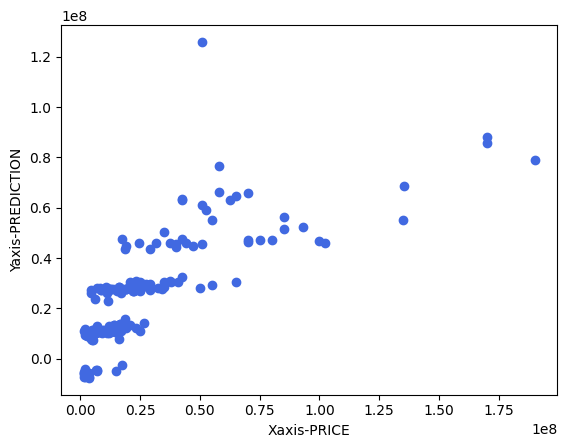

In [159]:
plt.scatter(y_test,prediction,color='royalblue')
plt.xlabel('Xaxis-PRICE')
plt.ylabel('Yaxis-PREDICTION')

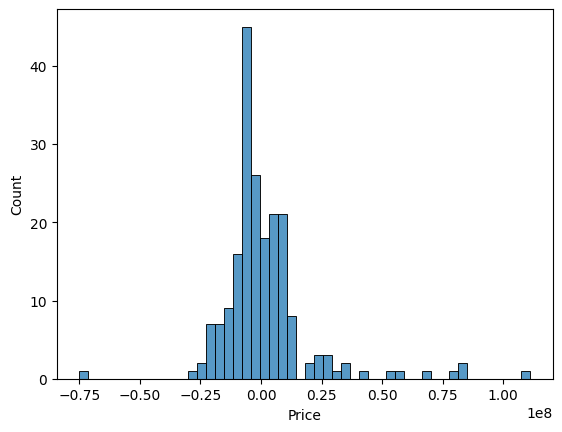

In [160]:
sns.histplot((y_test-prediction),bins=50);

In [161]:
lr.score(X_test,y_test)

0.5956141555247889